In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv('TRAIN.csv')
train_df

,Index,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7027,19/09/2018,19,23.5,58,0.4,1836,14.7,0.0,0.0,0.0,Autumn,No Holiday,No,0
7028,7028,19/09/2018,20,22.6,67,0.3,1737,16.1,0.0,0.0,0.0,Autumn,No Holiday,No,0
7029,7029,19/09/2018,21,21.7,63,1.8,1078,14.3,0.0,0.1,0.0,Autumn,No Holiday,No,0
7030,7030,19/09/2018,22,20.9,71,1.6,1057,15.4,0.0,0.1,0.0,Autumn,No Holiday,No,0


In [ ]:
test_df = pd.read_csv('TEST.csv')
test_df

,Index,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,20/09/2018,0,20.1,58,0.3,2000,11.5,0.0,0.0,0.0,Autumn,No Holiday,Yes
1,1,20/09/2018,1,20.0,59,1.1,1999,11.7,0.0,0.0,0.0,Autumn,No Holiday,Yes
2,2,20/09/2018,2,19.9,64,1.5,1755,12.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
3,3,20/09/2018,3,19.6,72,1.7,1140,14.4,0.0,0.0,0.0,Autumn,No Holiday,Yes
4,4,20/09/2018,4,19.6,74,1.4,847,14.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,1723,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
1724,1724,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
1725,1725,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
1726,1726,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Index                      7032 non-null   int64  
 1   Date                       7032 non-null   object 
 2   Hour                       7032 non-null   int64  
 3   Temperature(°C)            7032 non-null   float64
 4   Humidity(%)                7032 non-null   int64  
 5   Wind speed (m/s)           7032 non-null   float64
 6   Visibility (10m)           7032 non-null   int64  
 7   Dew point temperature(°C)  7032 non-null   float64
 8   Solar Radiation (MJ/m2)    7032 non-null   float64
 9   Rainfall(mm)               7032 non-null   float64
 10  Snowfall (cm)              7032 non-null   float64
 11  Seasons                    7032 non-null   object 
 12  Holiday                    7032 non-null   object 
 13  Functioning Day            7032 non-null   objec

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Index                      1728 non-null   int64  
 1   Date                       1728 non-null   object 
 2   Hour                       1728 non-null   int64  
 3   Temperature(°C)            1728 non-null   float64
 4   Humidity(%)                1728 non-null   int64  
 5   Wind speed (m/s)           1728 non-null   float64
 6   Visibility (10m)           1728 non-null   int64  
 7   Dew point temperature(°C)  1728 non-null   float64
 8   Solar Radiation (MJ/m2)    1728 non-null   float64
 9   Rainfall(mm)               1728 non-null   float64
 10  Snowfall (cm)              1728 non-null   float64
 11  Seasons                    1728 non-null   object 
 12  Holiday                    1728 non-null   object 
 13  Functioning Day            1728 non-null   objec

## Preprocessing

In [ ]:
train_df.Date = pd.to_datetime(train_df.Date)
test_df.Date = pd.to_datetime(test_df.Date)

In [ ]:
train_df

,Index,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,0,2017-01-12,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,1,2017-01-12,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,2,2017-01-12,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,3,2017-01-12,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,4,2017-01-12,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7027,2018-09-19,19,23.5,58,0.4,1836,14.7,0.0,0.0,0.0,Autumn,No Holiday,No,0
7028,7028,2018-09-19,20,22.6,67,0.3,1737,16.1,0.0,0.0,0.0,Autumn,No Holiday,No,0
7029,7029,2018-09-19,21,21.7,63,1.8,1078,14.3,0.0,0.1,0.0,Autumn,No Holiday,No,0
7030,7030,2018-09-19,22,20.9,71,1.6,1057,15.4,0.0,0.1,0.0,Autumn,No Holiday,No,0


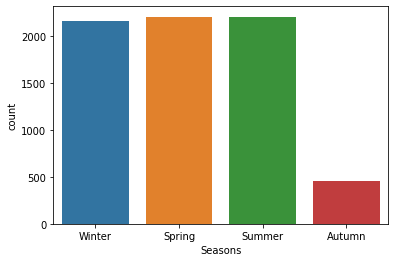

In [ ]:
sns.countplot(x = train_df.Seasons)

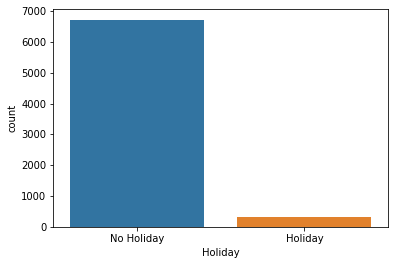

In [ ]:
sns.countplot(x = train_df.Holiday)

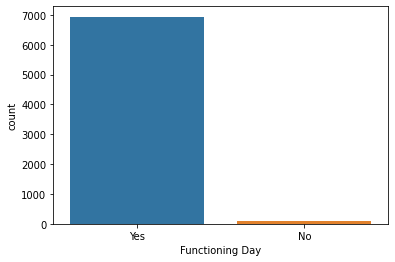

In [ ]:
sns.countplot(x = train_df['Functioning Day'])

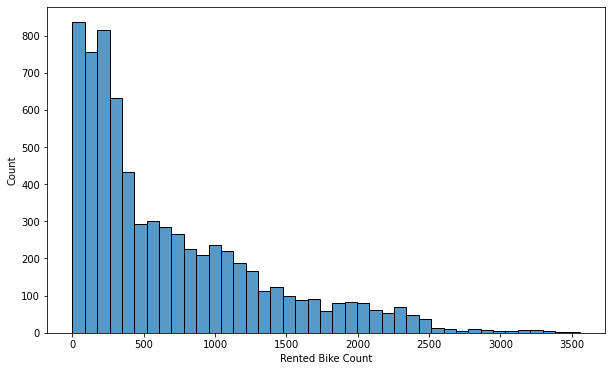

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(train_df['Rented Bike Count'])

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(go.Scatter(x=train_df.Date, y = train_df['Rainfall(mm)']))
fig.show()

In [ ]:
fig = go.Figure(go.Scatter(x=train_df.Date, y = train_df['Rented Bike Count']))
fig.show()

In [ ]:
for i in range(len(train_df.Holiday)):
  if train_df.Holiday[i] == 'Holiday':
    train_df.Holiday[i] = 1
  elif train_df.Holiday[i] == 'No Holiday':
    train_df.Holiday[i] = 0
for j in range(len(train_df['Functioning Day'])):
  if train_df['Functioning Day'][j] == 'Yes':
    train_df['Functioning Day'][j] = 1
  elif train_df['Functioning Day'][j] == 'No':
    train_df['Functioning Day'][j] = 0
train_df[['Functioning Day', 'Holiday']] = train_df[['Functioning Day', 'Holiday']].apply(pd.to_numeric)

In [ ]:
train_df_oh = pd.get_dummies(train_df)
train_df_oh

,Index,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Rented Bike Count,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,0,2017-01-12,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,254,0,0,0,1
1,1,2017-01-12,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,204,0,0,0,1
2,2,2017-01-12,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,173,0,0,0,1
3,3,2017-01-12,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,107,0,0,0,1
4,4,2017-01-12,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,78,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7027,2018-09-19,19,23.5,58,0.4,1836,14.7,0.0,0.0,0.0,0,0,0,1,0,0,0
7028,7028,2018-09-19,20,22.6,67,0.3,1737,16.1,0.0,0.0,0.0,0,0,0,1,0,0,0
7029,7029,2018-09-19,21,21.7,63,1.8,1078,14.3,0.0,0.1,0.0,0,0,0,1,0,0,0
7030,7030,2018-09-19,22,20.9,71,1.6,1057,15.4,0.0,0.1,0.0,0,0,0,1,0,0,0


In [ ]:
for i in range(len(test_df.Holiday)):
  if test_df.Holiday[i] == 'Holiday':
    test_df.Holiday[i] = 1
  elif test_df.Holiday[i] == 'No Holiday':
    test_df.Holiday[i] = 0
for j in range(len(test_df['Functioning Day'])):
  if test_df['Functioning Day'][j] == 'Yes':
    test_df['Functioning Day'][j] = 1
  elif test_df['Functioning Day'][j] == 'No':
    test_df['Functioning Day'][j] = 0
test_df[['Functioning Day', 'Holiday']] = test_df[['Functioning Day', 'Holiday']].apply(pd.to_numeric)

In [ ]:
test_df_oh = pd.get_dummies(test_df)
test_df_oh

,Index,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn
0,0,2018-09-20,0,20.1,58,0.3,2000,11.5,0.0,0.0,0.0,0,1,1
1,1,2018-09-20,1,20.0,59,1.1,1999,11.7,0.0,0.0,0.0,0,1,1
2,2,2018-09-20,2,19.9,64,1.5,1755,12.8,0.0,0.0,0.0,0,1,1
3,3,2018-09-20,3,19.6,72,1.7,1140,14.4,0.0,0.0,0.0,0,1,1
4,4,2018-09-20,4,19.6,74,1.4,847,14.8,0.0,0.0,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,1723,2018-11-30,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,1
1724,1724,2018-11-30,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,1
1725,1725,2018-11-30,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,1
1726,1726,2018-11-30,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,1


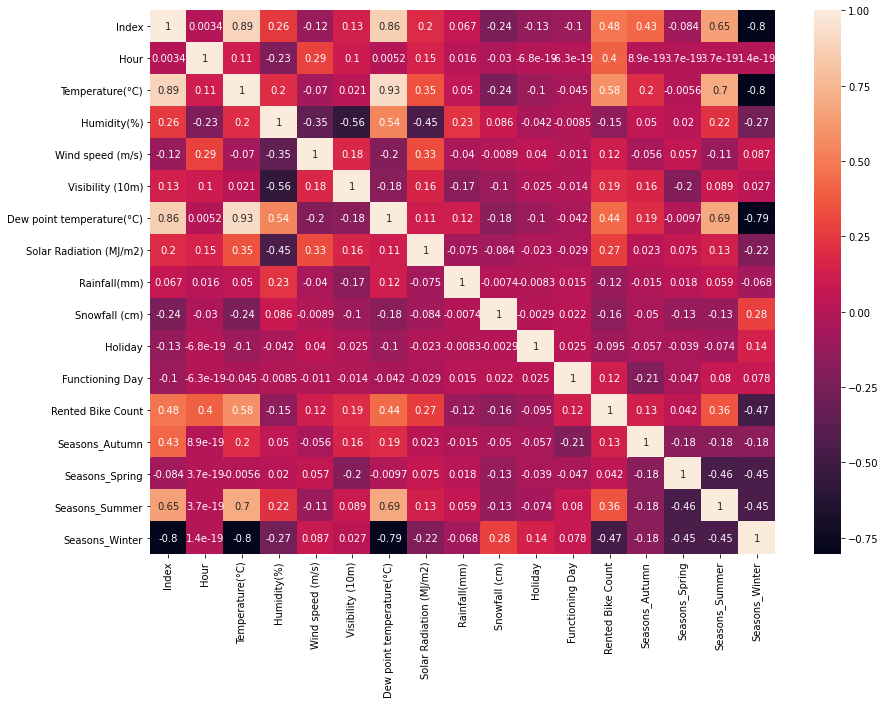

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(train_df_oh.corr(), annot=True)

In [ ]:
fig = go.Figure(data=go.Heatmap(z=train_df_oh.corr().values, x=train_df_oh.corr().index, y=train_df_oh.corr().columns))
fig.show()

In [ ]:
train_df_oh.corrwith(train_df_oh['Rented Bike Count'])

Index                        0.479174
Hour                         0.399272
Temperature(°C)              0.583093
Humidity(%)                 -0.153432
Wind speed (m/s)             0.122481
Visibility (10m)             0.193608
Dew point temperature(°C)    0.441591
Solar Radiation (MJ/m2)      0.272706
Rainfall(mm)                -0.115995
Snowfall (cm)               -0.156732
Holiday                     -0.095459
Functioning Day              0.124329
Rented Bike Count            1.000000
Seasons_Autumn               0.132386
Seasons_Spring               0.042420
Seasons_Summer               0.357857
Seasons_Winter              -0.473370
dtype: float64

In [ ]:
train_df_oh.drop(columns=['Index'], axis=1, inplace=True)

train_df_oh['month']= train_df_oh['Date'].dt.month
train_df_oh['day']= train_df_oh['Date'].dt.day
train_df_oh.drop('Date', axis=1, inplace=True)
train_df_oh

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Rented Bike Count,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,month,day
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,254,0,0,0,1,1,12
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,204,0,0,0,1,1,12
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,173,0,0,0,1,1,12
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,107,0,0,0,1,1,12
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,78,0,0,0,1,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,19,23.5,58,0.4,1836,14.7,0.0,0.0,0.0,0,0,0,1,0,0,0,9,19
7028,20,22.6,67,0.3,1737,16.1,0.0,0.0,0.0,0,0,0,1,0,0,0,9,19
7029,21,21.7,63,1.8,1078,14.3,0.0,0.1,0.0,0,0,0,1,0,0,0,9,19
7030,22,20.9,71,1.6,1057,15.4,0.0,0.1,0.0,0,0,0,1,0,0,0,9,19


In [ ]:
test_df_oh.drop(columns=['Index'], axis=1, inplace=True)

test_df_oh['month']= test_df_oh['Date'].dt.month
test_df_oh['day']= test_df_oh['Date'].dt.day
test_df_oh.drop('Date', axis=1, inplace=True)
test_df_oh

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,month,day
0,0,20.1,58,0.3,2000,11.5,0.0,0.0,0.0,0,1,1,9,20
1,1,20.0,59,1.1,1999,11.7,0.0,0.0,0.0,0,1,1,9,20
2,2,19.9,64,1.5,1755,12.8,0.0,0.0,0.0,0,1,1,9,20
3,3,19.6,72,1.7,1140,14.4,0.0,0.0,0.0,0,1,1,9,20
4,4,19.6,74,1.4,847,14.8,0.0,0.0,0.0,0,1,1,9,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,1,11,30
1724,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,1,11,30
1725,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,1,11,30
1726,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,1,11,30


In [ ]:
test_df_oh['Seasons_Spring'] = 0
test_df_oh['Seasons_Summer'] = 0
test_df_oh['Seasons_Winter'] = 0
test_df_oh

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,month,day,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,-1.661325,1.421683,-0.024775,-1.273626,0.855072,1.254324,-0.642449,-0.137718,-0.129007,-0.273179,0.360764,0.0,0.025677,0.213141,0,0,0
1,-1.516862,1.404602,0.027307,-0.408309,0.853359,1.284034,-0.642449,-0.137718,-0.129007,-0.273179,0.360764,0.0,0.025677,0.213141,0,0,0
2,-1.372399,1.387522,0.287713,0.024350,0.435338,1.447436,-0.642449,-0.137718,-0.129007,-0.273179,0.360764,0.0,0.025677,0.213141,0,0,0
3,-1.227936,1.336280,0.704364,0.240679,-0.618282,1.685112,-0.642449,-0.137718,-0.129007,-0.273179,0.360764,0.0,0.025677,0.213141,0,0,0
4,-1.083473,1.336280,0.808526,-0.083815,-1.120250,1.744531,-0.642449,-0.137718,-0.129007,-0.273179,0.360764,0.0,0.025677,0.213141,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,1.083473,-1.294132,-1.274727,1.214161,0.673473,-1.984012,-0.642449,-0.137718,-0.129007,-0.273179,0.360764,0.0,0.765170,1.634080,0,0,0
1724,1.227936,-1.430777,-1.118483,0.889667,0.855072,-1.924593,-0.642449,-0.137718,-0.129007,-0.273179,0.360764,0.0,0.765170,1.634080,0,0,0
1725,1.372399,-1.567422,-1.014320,-1.273626,0.800250,-1.924593,-0.642449,-0.137718,-0.129007,-0.273179,0.360764,0.0,0.765170,1.634080,0,0,0
1726,1.516862,-1.652825,-0.910157,-0.516474,0.613511,-1.909739,-0.642449,-0.137718,-0.129007,-0.273179,0.360764,0.0,0.765170,1.634080,0,0,0


In [ ]:
fig = go.Figure(data=go.Heatmap(z=train_df_oh.corr().values, x=train_df_oh.corr().index, y=train_df_oh.corr().columns))
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
y = train_df_oh['Rented Bike Count']
X = train_df_oh.drop('Rented Bike Count', axis=1)
X.shape, y.shape

((7032, 17), (7032,))

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [ ]:
scaler = StandardScaler()
test_df_oh = pd.DataFrame(scaler.fit_transform(test_df_oh), columns=test_df_oh.columns)

In [ ]:
X_train.shape, X_test.shape

((5625, 17), (1407, 17))

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

[11:06:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Feature Importances :  [0.10224191 0.21085544 0.11123066 0.00355521 0.00216495 0.04643855
 0.09294636 0.14493783 0.00028668 0.00632015 0.09124561 0.00364761
 0.04281715 0.01822751 0.10598088 0.01031373 0.00678982]


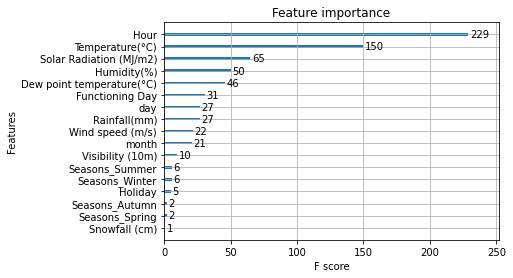

In [ ]:
from xgboost import plot_importance

print("Feature Importances : ", xgb_regressor.feature_importances_)

# plot feature importance
plot_importance(xgb_regressor)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score
val_pred = xgb_regressor.predict(X_test)

rmse = mean_squared_error(y_test, val_pred, squared=False)
print(rmse)

240.79880514853363


In [ ]:
xgb_regressor.get_booster().feature_names

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Holiday',
 'Functioning Day',
 'Seasons_Autumn',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'month',
 'day']

In [ ]:
test_df_oh = test_df_oh[xgb_regressor.get_booster().feature_names]
test_df_oh

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,month,day
0,-1.661325,1.421683,-0.024775,-1.273626,0.855072,1.254324,-0.642449,-0.137718,-0.129007,-0.273179,0.360764,0.0,0.0,0.0,0.0,0.025677,0.213141
1,-1.516862,1.404602,0.027307,-0.408309,0.853359,1.284034,-0.642449,-0.137718,-0.129007,-0.273179,0.360764,0.0,0.0,0.0,0.0,0.025677,0.213141
2,-1.372399,1.387522,0.287713,0.024350,0.435338,1.447436,-0.642449,-0.137718,-0.129007,-0.273179,0.360764,0.0,0.0,0.0,0.0,0.025677,0.213141
3,-1.227936,1.336280,0.704364,0.240679,-0.618282,1.685112,-0.642449,-0.137718,-0.129007,-0.273179,0.360764,0.0,0.0,0.0,0.0,0.025677,0.213141
4,-1.083473,1.336280,0.808526,-0.083815,-1.120250,1.744531,-0.642449,-0.137718,-0.129007,-0.273179,0.360764,0.0,0.0,0.0,0.0,0.025677,0.213141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,1.083473,-1.294132,-1.274727,1.214161,0.673473,-1.984012,-0.642449,-0.137718,-0.129007,-0.273179,0.360764,0.0,0.0,0.0,0.0,0.765170,1.634080
1724,1.227936,-1.430777,-1.118483,0.889667,0.855072,-1.924593,-0.642449,-0.137718,-0.129007,-0.273179,0.360764,0.0,0.0,0.0,0.0,0.765170,1.634080
1725,1.372399,-1.567422,-1.014320,-1.273626,0.800250,-1.924593,-0.642449,-0.137718,-0.129007,-0.273179,0.360764,0.0,0.0,0.0,0.0,0.765170,1.634080
1726,1.516862,-1.652825,-0.910157,-0.516474,0.613511,-1.909739,-0.642449,-0.137718,-0.129007,-0.273179,0.360764,0.0,0.0,0.0,0.0,0.765170,1.634080


In [ ]:
pred = xgb_regressor.predict(test_df_oh)
pred

array([644.7759 , 538.96906, 447.34113, ..., 433.0091 , 409.9849 ,
       303.93744], dtype=float32)

In [ ]:
prediction = pd.DataFrame({sample.columns[0]:test_df.Index, sample.columns[1]:pred})
prediction

,Index,Rented Bike Count
0,0,644.775879
1,1,538.969055
2,2,447.341125
3,3,462.128571
4,4,453.859680
...,...,...
1723,1723,448.519348
1724,1724,441.200348
1725,1725,433.009094
1726,1726,409.984894
